# Author: Husam Abdelrahim
# Project 2

# Dataset 1: Student test performance analysis

# Student testing performance analysis

## Intro:

The analysis that we are going to be making is that we wil lbe taking a look and basically examine the the test performance of the student that is layed out across multiple terms, I'm going to be seeking for a pattern, a possiblity of trying to understand the trends that is being applied and possibly see how the educational data is very crucial for trying to understand the student progress throughout the semester, it can give us insights with what opportunies could be presented to help the student, finding better methods, and ability to basically know the test scoress in the demographics and the time periods that is being presented. So by reviewing the analysis with the test scoress and understand the time period we can try our best to gain the insight and understand the academic performance

For the test we are going to be working with two that is bascially being crossed with three terms in this scenarion and the dataset came in a raw wide format that has managed to of course present analytical challenge, so we are going to bascially transform this data in a tidy format and I'll show how having a much more cleaner and proper data is very insightful for us to utilize and review 

## Data Desc

The data that we are working with has info about 5 students who took two different examination with scores that has been recorded

- We have the student ID that is presented (id, name, and phone #)
- Personal Demo Info presneted (sex and age is combined into one column)
- We have the test that is identificed
- and the scores of the thre examples

The structure that we are working with basically has a structure of a "wide" dataset because we thhat

1. the variables of sex and age are currently combined into one column
2. we see that the term scores is spreaded out throughout the multiple column that is presented.
3. We also have that the student info is basically repeated in different rows for different test which is not clean overall for a data set to have 

In [1]:
# we will be using pandas as required and matplotlib to just show the visualization that is presented in my work.
import pandas as pd # we are going to be importing pandas to manipulate the data
import matplotlib.pyplot as plt # using matplotlib to visualize our data that we are going to be presenting in my work

In [2]:
# First we are going to be read the data and and just looking at the 
# raw data file we will basically make the data in python

# this is how we are going to be defining the data 

data = [
    [1, "Mike", 134, "m_12", "test 1", 76, 84, 87],
    [2, "Linda", 270, "f_13", "test 1", 88, 90, 73],
    [3, "Sam", 210, "m_11", "test 1", 78, 74, 80],
    [4, "Esther", 617, "f_12", "test 1", 68, 75, 74],
    [5, "Mary", 114, "f_14", "test 1", 65, 67, 64],
    [1, "Mike", 134, "m_12", "test 2", 85, 80, 90],
    [2, "Linda", 270, "f_13", "test 2", 87, 82, 94],
    [3, "Sam", 210, "m_11", "test 2", 80, 87, 80],
    [4, "Esther", 617, "f_12", "test 2", 70, 75, 78],
    [5, "Mary", 114, "f_14", "test 2", 68, 70, 63]
]

# now we are going to be creating a DataFrame with what we are working with

df = pd.DataFrame(data, columns = ["id", "name", "phone", "sex and age",
                                   "test number", "term 1", "term 2", "term 3"])

print("Original 'wide' formatting the data:")
df.head()

Original 'wide' formatting the data:


,id,name,phone,sex and age,test number,term 1,term 2,term 3
0,1,Mike,134,m_12,test 1,76,84,87
1,2,Linda,270,f_13,test 1,88,90,73
2,3,Sam,210,m_11,test 1,78,74,80
3,4,Esther,617,f_12,test 1,68,75,74
4,5,Mary,114,f_14,test 1,65,67,64


## Data Exploration

Before anything let's take look at the data set that we have presended and this wide formatted dataset that we are working with we see that there are a few issues that is being presented 

1. As we can see with our work that the "sex and age" column has two different variables which one does not really look clean to present in the data.

2. Then we have the term scores that are spreaded across the columns

3. Another error that could be pointeed out from this data is that each student tend to atleast appear twice in this work 

So now to make sure that we actually get to properly intake the data and present what is needed to be done is that we have to apply certain applications of tidying the data principles that is presented in our work.

In [3]:
# Now we will get the basic dataset information that is provided

print("Dataset Information:")
print(f"Number of records: {len(df)}")
print(f"Number of unique students: {df['name'].nunique()}")
print(f"Number of tests: {df['test number'].nunique}")

# now what is going to be occured is that we will be checkign the data types and the missing values that is presented 
df.info()

Dataset Information:
Number of records: 10
Number of unique students: 5
Number of tests: <bound method IndexOpsMixin.nunique of 0    test 1
1    test 1
2    test 1
3    test 1
4    test 1
5    test 2
6    test 2
7    test 2
8    test 2
9    test 2
Name: test number, dtype: object>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           10 non-null     int64 
 1   name         10 non-null     object
 2   phone        10 non-null     int64 
 3   sex and age  10 non-null     object
 4   test number  10 non-null     object
 5   term 1       10 non-null     int64 
 6   term 2       10 non-null     int64 
 7   term 3       10 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 772.0+ bytes


## Time for data transfomration and the data presentation 

In order for us to transform the the data and make it into a tidy format we I will be doing is that I will follow a twop step proces

1. **First step we: seperate the the variables combined**: Now what I will be doing is that we are going to be split the "sex and age" and put it in a column and there we are going to basically have it into two distincy columns 

2. **Reshapign the table from a wide data set into a long format**: we are going to be converting the the score of the term cloumn and we are going to put it in a single score whcih is basically corresponds to the term identifier

By having this sort of transfomation what I will be doing is that I am going to basically follow the procedure for the tidy data:

- Each of the variable will be needs a variable form
- each of the observation that is presented in our data will have a row
- Each of the observation unit will form a table

First, what we are going to do is that we are going to split the "sex" and "age" into two separate columns and basically by doing this we are following the pinciple of that data and what each data wold not have their own columns

In [4]:
# in this section what is going to be occured is that we are going to split the two variables into separate colums

df['sex'] = df['sex and age'].str.split('_').str[0]
df['age'] = df['sex and age'].str.split('_').str[1].astype(int)

# we are not going to be removing the original combined column that was presneted in the raw data
df = df.drop ('sex and age', axis = 1)

# and now we are going to be displaying the result 
print("The results: After iniating a splitting of combined variables:")
df.head()

The results: After iniating a splitting of combined variables:


,id,name,phone,test number,term 1,term 2,term 3,sex,age
0,1,Mike,134,test 1,76,84,87,m,12
1,2,Linda,270,test 1,88,90,73,f,13
2,3,Sam,210,test 1,78,74,80,m,11
3,4,Esther,617,test 1,68,75,74,f,12
4,5,Mary,114,test 1,65,67,64,f,14


So now in this step what I wil lbe doing is ability to have a string maniuplation functions so here are the steps that is being provided.

1. We are going to be splitting the "sex and the age" column at the underscore of the character that is provided
2. I am going to basically extract the element which is the (m/f) as gender to present
3. What I will be doing is that I will be doing extract the second element as the age and convert it into an int
4. we are going to be removing the original combined column making it into a tidy is going to help us a lot with understanding the analysis 

## Step 2: Rehsaping the dataset of a wide to a long format tidy

The second transformation will basically involve the converstion of the term score going from the wide format to the so basically instead of having multiple columns we are going to basically have it in a long format that has a term indetifier

As explained we have to convert the term score of the column into a long format so this would actually yield us a result of having a single 'score' column with  the 'term' identifier doing this will make it easier for us to analyze and understand the score

In [5]:
# the DataFrame we will now convert from wide to long format

df_long = pd.melt(
    df,
    id_vars=['id', 'name', 'phone', 'sex', 'age', 'test number'],
    value_vars=['term 1', 'term 2', 'term 3'],
    var_name='term',
    value_name='score'
)

# we are going to save the tidy format to a csv file on the hardware that shoudl be provided 

df_long.to_csv("student_data_tidy.csv", index=False)
print("CSV file 'student_data_tidy.csv' created successfully!")

# we are to basically tidy the structure that was provided 


print ("A Data to 'tidy' in a long format:")
df_long.head(10)

CSV file 'student_data_tidy.csv' created successfully!
A Data to 'tidy' in a long format:


,id,name,phone,sex,age,test number,term,score
0,1,Mike,134,m,12,test 1,term 1,76
1,2,Linda,270,f,13,test 1,term 1,88
2,3,Sam,210,m,11,test 1,term 1,78
3,4,Esther,617,f,12,test 1,term 1,68
4,5,Mary,114,f,14,test 1,term 1,65
5,1,Mike,134,m,12,test 2,term 1,85
6,2,Linda,270,f,13,test 2,term 1,87
7,3,Sam,210,m,11,test 2,term 1,80
8,4,Esther,617,f,12,test 2,term 1,70
9,5,Mary,114,f,14,test 2,term 1,68


What is being occured in this transfomration is that I will be using the pandas and following the 'melt()' this will allow us to:

1. We are going to be keeping the identification and understand the demographic column that is being presented in our work

2. We are are going to pivot the score of the oclumn into a single column 'score'

3. We will be creating a term that will have a column but also it will be able to identify the term each score

The the tidy data and the structure of will have it's own advantages:

- Now each row will basically presnt the student score so for example there will be score one test now but for one term

- We will be structure that all the variable that is presneted will be having their own column

- The data that is presented will be a lot more structure and have a better understanding of the analysis of the sutdent performance

So having this in a tidy format will basically allow for a much more flexible insight that could be used for further analysis

## The Data Analysis

As we can see that once we have reformed our data into a tidy format we can make observation and understand the the analysis much better. So let's get to see with what is going on actually get to calcualte 

### Firstly, what will be occured is that I will be calculating the avg score that is being presneted for each of the student and ahve a better insight of what is going.

In [6]:
# It's time to calcuate the avg scores that is being presented for each indiviual student by the test that is beign provided 
student_avg = df_long.groupby(['name', 'test number'])['score'].mean().reset_index()
print("average scores by the students examination and testing:")
student_avg

average scores by the students examination and testing:


,name,test number,score
0,Esther,test 1,72.333333
1,Esther,test 2,74.333333
2,Linda,test 1,83.666667
3,Linda,test 2,87.666667
4,Mary,test 1,65.333333
5,Mary,test 2,67.000000
6,Mike,test 1,82.333333
7,Mike,test 2,85.000000
8,Sam,test 1,77.333333
9,Sam,test 2,82.333333


What this analysis is tend to display and the different overall is that 
- We see that Linda is the one who is very consistent on manging to achieve the highest average we see that on 83.67 on the first exam but on the second test we see that on the second exam it she manage to achieve a 87.67 on the second exam

- For Mary we see that on the both of examination she is the lowest performer and on the first exam =  65.33 and on the second exam = 67.00

- By analysis that we can make here we see that sutdents are achieving a much higher score that is being presented on test number 2 so we can make an assumptions that maybe the teaching method was effective. 

## Improvement of the performance of the analysis provided:

To improve upon from this what will be occured is that there will be a comparision presnet and it will show how each of the student performance tend to change between the 2 examination

In [7]:
# now with what is being occured I will basically be creating a pivot table for us to compare the first test and the second test that is provided.

test_comparison = student_avg.pivot(index='name', columns='test number', values='score')
test_comparison.columns = ['test 1', 'test 2']  
test_comparison['improvement'] = test_comparison['test 2'] - test_comparison['test 1']

# now with what is being occured he is that weill be sorting this from the highest to the lowest

test_comparison = test_comparison.sort_values('improvement', ascending=False).reset_index()

print("Student enhancement performance between examination/test (sorted by improvement):")
test_comparison

Student enhancement performance between examination/test (sorted by improvement):


,name,test 1,test 2,improvement
0,Sam,77.333333,82.333333,5.000000
1,Linda,83.666667,87.666667,4.000000
2,Mike,82.333333,85.000000,2.666667
3,Esther,72.333333,74.333333,2.000000
4,Mary,65.333333,67.000000,1.666667


The improvement of the analysis presented:

- We see that student has been shown an improvement from the first examination compared to test and test 2
- Sam has shown a 5.00 rating when it comes down to the postiive improvement
- Mary is the one that shown a least improvement - 1.67 points
- The avg student of the improvement with all students was at around the 3.0 ratings
- The range of the improvement which is being occured from the (1.67 to 5.00) we see that ther is a possiblity of the different learns that is being applied which it could be shown that new learning method is actually being effective! 

## The demographic analysis that is presented 

Now what is going to be occured is that we are going to have a certain understanding and try to understand the demographic factors and the performance, next we will be reviewing and analyzing the scores that is being presented

#### The performance of the analysis by age 

In [8]:
# Now we will be adding the age info to our comparsion DataFrame
age_data = df[['name', 'age']].drop_duplicates().set_index('name')
test_comparison['age'] = test_comparison['name'].map(age_data['age'])

# We are going to be calculating teh avg scores and udnerstand the improvements of it by age. 
age_analysis = test_comparison.groupby('age')[['test 1', 'test 2', 'improvement']].mean()
print("Performance analysis by age:")
age_analysis

Performance analysis by age:


,test 1,test 2,improvement
age,,,
11,77.333333,82.333333,5.000000
12,77.333333,79.666667,2.333333
13,83.666667,87.666667,4.000000
14,65.333333,67.000000,1.666667


We can see that in teh age analysis it basically reveals and very interesting pattern so let's review it!

- The younger students that are in the age 11 are bascially showing the highest improvement with at least 5 points
- The older students which in this scenario 14 are showing the lowerst improvement with a 1.67 points
- There seems to be a relationship between teh age and the improvement and as age continues to go on the academic score tend to go down

### Performance analysis based on the gender

So now what we are going to be doing is basically examine the performance and understand the differences that is based on the gneder and then we will try to analyze avg ascire so basically this is between the mane and the women 

Performance analysis by gender:


<Figure size 1000x600 with 0 Axes>

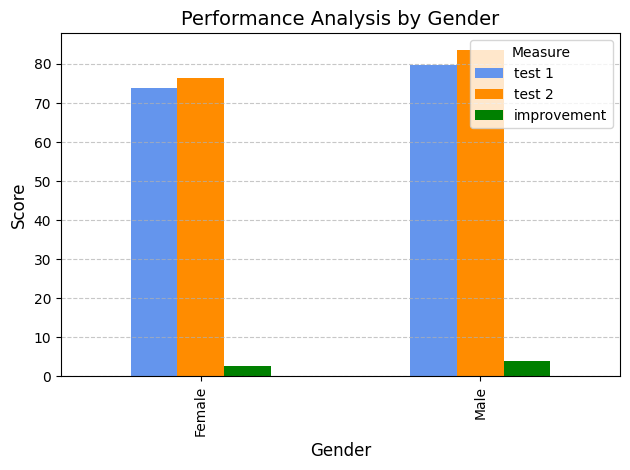

In [9]:
# we willl be adding the gender infromation here for the comparsion of th data frame
gender_data = df[['name', 'sex']].drop_duplicates().set_index('name')
test_comparison['gender'] = test_comparison['name'].map(gender_data['sex'])

# now we are going to calculate

gender_analysis = test_comparison.groupby('gender')[['test 1', 'test 2', 'improvement']].mean()
print("Performance analysis by gender:")
gender_analysis

# what is being occured here is that we are going to find the gender performance comparision and basically use it for deeper analysis 

plt.figure(figsize=(10, 6))
gender_analysis.plot(kind='bar', color=['cornflowerblue', 'darkorange', 'green'])
plt.title('Performance Analysis by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Measure')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.tight_layout()
plt.show()

The gender analysis is tending to show:
- thatt the male students currently would have a mu higher avg improvement with at least 3 points comapred to the femal students which is average around 2.0
- the female student had a slighty higher avg that is displayed on teh first examination but not the second
- By the second examination it should that the male students have passed hte female students in terms of avg scoree which is like 77 and 76
- There is a different in terms of the rate by 1 point and approximately a vast improvement with a 40% higher for the male students

## Visualization for the finding

Having a representation with the vusalization is really important and one it can help us understand with the patterns that is being presented and the trends that is being presented in the data

### Student improvment 

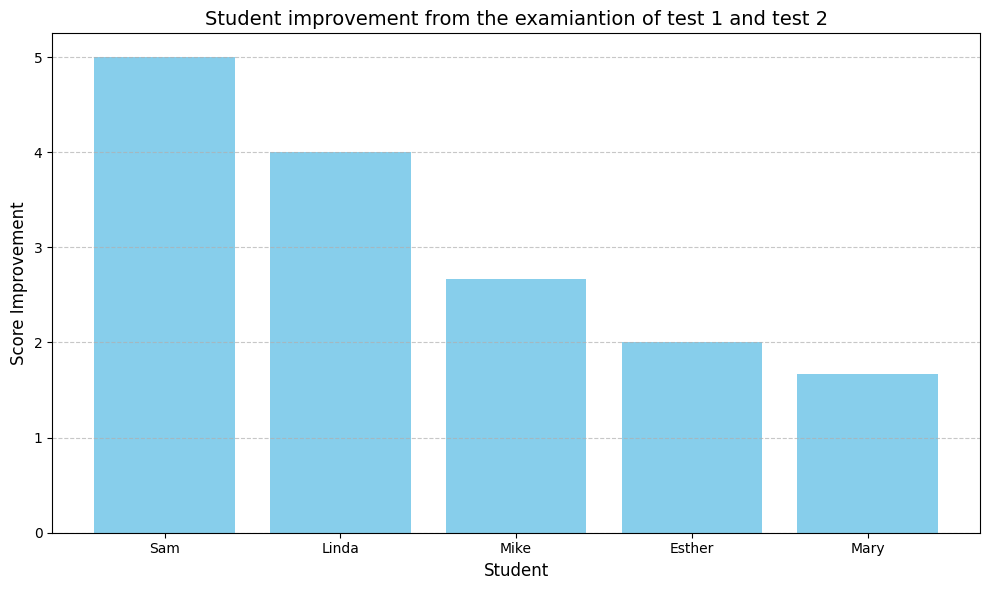

In [10]:
# Visualization 1: We are going to understand the how student improvement from first and second exam.
plt.figure(figsize=(10, 6))
plt.bar(test_comparison['name'], test_comparison['improvement'], color='skyblue')
plt.title('Student improvement from the examiantion of test 1 and test 2', fontsize=14)
plt.xlabel('Student', fontsize=12)
plt.ylabel('Score Improvement', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)  # we are going to keep the names horizontal 
plt.tight_layout()
plt.savefig('student_improvement.png')  # this here will be saving the figure but only if that is needed 
plt.show()

In this visualiation is already shows that there are varying level that is being prestented and the improvement that is being occured with the students and Sam is the one that seems to be holding the most singificant progress while Mary really tends to show the market the least

## Test comparision

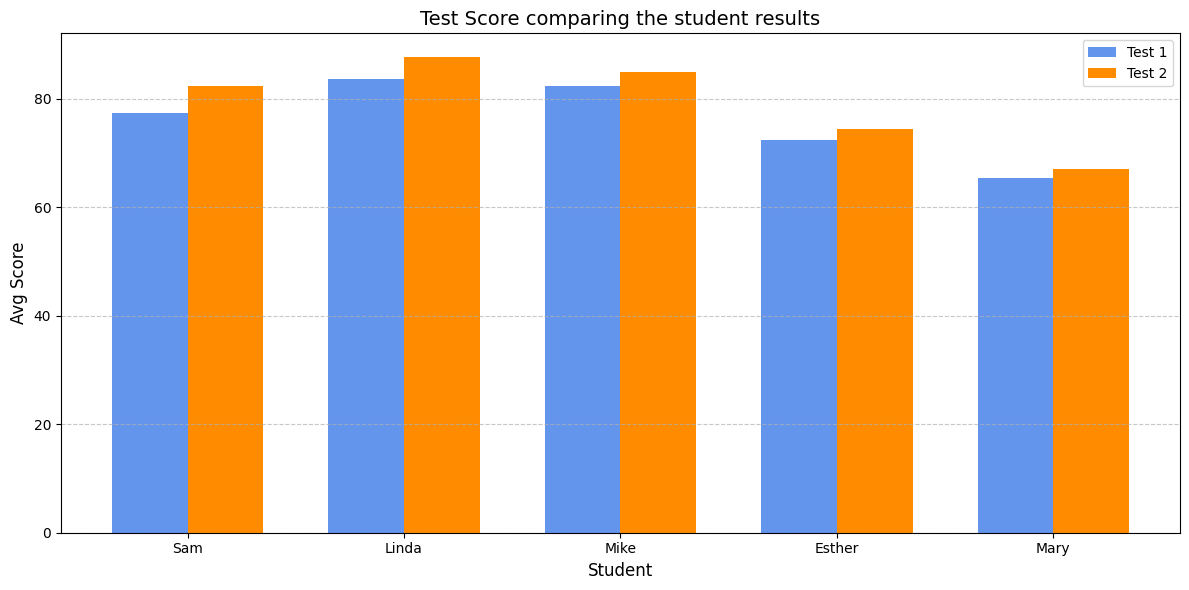

In [11]:
# Visualization 2: we are now going to be comparting the test cre comparison 

plt.figure(figsize=(12, 6))
x = range(len(test_comparison))
width = 0.35

x = range(len(test_comparison))
width = 0.35

plt.bar(x, test_comparison['test 1'], width, label='Test 1', color='cornflowerblue')
plt.bar([i + width for i in x], test_comparison['test 2'], width, label='Test 2', color='darkorange')

plt.xlabel('Student', fontsize=12)
plt.ylabel('Avg Score', fontsize=12)
plt.title('Test Score comparing the student results', fontsize=14)
plt.xticks([i + width/2 for i in x], test_comparison['name'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Now we are going to look at this graph and look at this from side by side comparion and try to understand the high lights that is being presented, as we can see it displays the high light of test number 1 and test number 2

## Performance by the age!

<Figure size 1000x600 with 0 Axes>

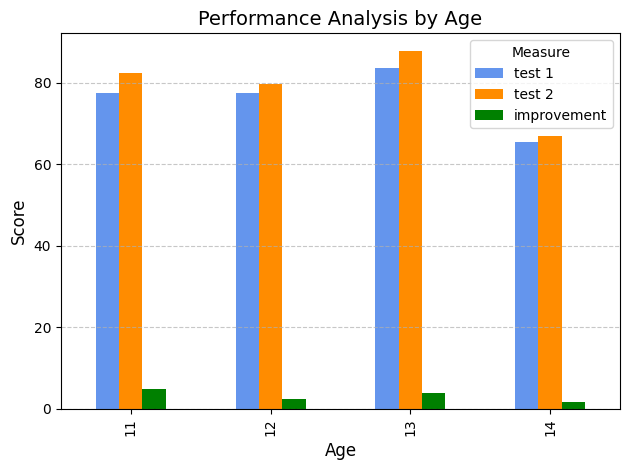

In [12]:
# Visualization 3: Now wea re going to be focing more on the performance by age
plt.figure(figsize=(10, 6))
age_analysis.plot(kind='bar', color=['cornflowerblue', 'darkorange', 'green'])
plt.title('Performance Analysis by Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Measure')
plt.tight_layout()
plt.show()

This comparision that we see basically displays the performance of each of the student and the improvement between the test that is being occureed

## Key findings and the insights

In this work we see that the analysis of student testing exmaination reveals a major pattern overall for example there is decreasing with the improvement but also teh age increases.

The analysis of the studnet is basically reveals the data and teh important patterns and the trends that is being presented:

## 1. The overall statistics displayed

We see that in every student in the data set tend to show an improvement from the first examination and the second examination and have an avg with the 3 points. We see that
- There has been a change of method when it comes to learning or new materials were provided because there is a significant when it comes down to the test periods
- Now we can also get see that maybe the difficulty was much easier and there had to be some sort of adjustmetn that was being occured 
- Students probably had a better idea with the testing

We see that there a improvement with the students performance for example there would be like a significant amount increase going from at least 1.67 to atleast 5.0 point which shows different learning techniques or ability to take a taking ability.

## 2. Understanding the indiviaul performance aptterns

We see in the data that ireveals a pattern at the certain level:

- **Sam (Age 11, Male)**: Here we see that the student is show a very huge dramastic improvement with a number of 5 points and from the first examination we see that 77 but then on test 2 Sam managed to achievive a much hihger score of 82 which is basically a good amount of increase that is show in the performance

- **Linda (Age 13, Female)**: Linda continues to show proper performance and the test that is being displayed one we see that there is 83 and the 87 there is a 4 point increase and shows that 4% increase and Linda continues to demostrate that she is not slowing down but progressing with her work

- **Esther (Age 12, Female)**: We see that Esteh tends to be consistent but not doing the best and below certain avg

- **Mary (Age 14, Female)**: Mary tends to show the leave improvement especially when taking the examin and we see that there is a 1.67 increase and continues to show that she is the lower performer, although there was improvement it was enough 

- **Mike (Age 12, Male)**: There has been an improvment with Mike which basically continues to show a slightly above test examination result

## 3. Now we see the performance pattern for the demographic

The analysis we see that there is a much interesting pattern that is being displayed 

#### Let's review the age patterns that is being dispalyed in this data:

The data tend to show the age and the improvement relation let's review togehter

- Age 11: 5.00 Increase 
- Age 12: 2.33 increase - and this is between the two avg of Mike and the Esther
- Age 13: 4.00 increase
- Age 14: 1.67 increase

We see how this tend tends to show  the differences when it comes down to hte learning experience and possibly the approach of the education and by this pattern could possibly show that that it was indeed more effective but because we are working with a data that is much more smaller data there isn't much to go by on the observation 

## The gender pattern that is being displayed:

We see that the male students are show more improvement and if you look at the stats we do see that male students had a lower score but by test test they have mangaed to pass and get to achieve a much higher score. And again this is basically comes down to the education pattern or the way the student have managed to intake the material to learn basically.

## The Conclusion and the Implications when coming down to education

In this data that is being presented there are some imporant factors that we can see

### 1. Individual strat that is being displaeyed 

We see that in the wide varation would really need the implications and ability to change some aspect to meet the approaches of the academic 

- **Reviewing the students like Mary for example**: We see in the data the Mary was the one that was struggling and with additional support in the academic sphere we know that this could help mary in a long run 

-- **A high academic success for example like Linda**: While Linda has shown a good amount of academic success there is always way to grow in the academic sphere so there should be some sort of the strat to follow and see how the student can continue to engage with the progress. 

### 2. Reviewing the age and the teaching method that is provided 

Reviewing the realtionship between the age and trying to understand the improvement we can see that there are some benefits

--**Younger students**: We see that there is a stronger correlation when it comes down with the academic and we see that certain method it's actually work and maybe the educators can use use those method to help with the older students and apply a effective method.

-- **Older Students**: We see that the older states tend to have lower rate and outcome and this could be because of not having a proper or following the teaching method so some of the strategies really needs to be adjusted. 

### 3. Looking at the education adnd the gender when it comes down to the education

There are different result when it comes to down the males and females and let's investigate a little further

- One should know that the educators should closely observe the method that is being taught and see how it actually affects one group
- Including a teaching method that can really include a proper approach  

### 4. Focusing on the design

The consistent improvement that is shown across the board we see that there are soem that raise some questions in terms of the test design:

- The testing do we know if there is any comaprioson especially when it comes down to the difficulty
- Did the examination align with the teaching method that was being provided
- Educators should consider on the test difficutly or ability to establish a sensible baseline that really work with the variable this being provided in this data set

## Limitations and the research 

There is a limitations that should be reviewed for this purpose let's see what limits 

1. **Small not big data**: The more data you have the more your able to work with the data because it can provide a much deeper insight and in this case.
2. **the time frame**: The data only provided the two examination to review so it's somewhat limited to what we are working with 

Future research that can really enhance the limitations:

- Basically what can be done is that include more students and provide more variables that could be reviewed
- What can be done is that we can try to track about hte performance
- Understanind the teaching method that is provided 
- Knowing the difficulty and understand what changes could occur and how to align the idea wit the students. 

## The Data Transformation and the value

In this section what I would like to demostrate on why having a wide data and transform it into a tidy format and what benefit that it poses so here are some of the benefit that it intends to pose

1. **Improved flexibility for the analytics**: This is very important because once we did the transformation we were able to get meaningful data but in the orignal data it was impossible to get a deeper meaning of this analysis and would be somewhat impossible to even break down the data in the orignal form\

2. **Enhanced capabilites**: THe tidy format will help us create a meaning answer and will also help us with the visualization that is presented that communicates with the patterns that is being presented

3. **Understaning the demeographic analysis presented**: After seprating the sex and the age we started to see a much more distinct analyses that would basically show the patterns which is very valualbe in my work 

4. **The structure**: We see that in the struture this method is used for data nalysis and this would make it a lot easier for us to get the results using such methods

Overall this was pretty straight forward and provided me with information on why it's very important to have data preperation and what the dat acan tell overall.